### Income Prediction

#### Business Understanding
- In today’s data-driven world, understanding the factors that influence income levels is crucial for various stakeholders, including policymakers, businesses, and individuals. By leveraging advanced data analysis and machine learning techniques, we can predict an individual's income based on a variety of demographic, educational, and occupational features. This insight can be instrumental in shaping economic policies, designing targeted marketing strategies, and offering personalized financial advice.

#### Objectives
- The primary objective of the income prediction project is to develop a robust predictive model that accurately forecasts an individual’s income based on specific features. This model will help stakeholders to:

- Identify Key Income Determinants: Understand the most significant factors that influence income levels.
Policy Formulation: Assist policymakers in identifying areas where interventions are needed to reduce income inequality and promote economic growth.
- Business Strategy: Enable businesses to segment their market more effectively and tailor their products and services to different income groups.
Personal Financial Planning: Provide individuals with insights into potential income trajectories based on their current profile and career choices.

#### Data Understanding

- ID: Unique identifier for each entry.
- age: Age of the individual (int64).
- gender: Gender of the individual (object).
- education: Level of education attained (object).
- class: Class category (object, many missing values).
- education_institute: Institution where education was received (object, many missing values).
- marital_status: Marital status of the individual (object).
- race: Race of the individual (object).
- is_hispanic: Hispanic ethnicity indicator (object).
- employment_commitment: Employment commitment status (object).
- unemployment_reason: Reason for unemployment (object, many missing values).
- employment_stat: Employment status indicator (int64).
- wage_per_hour: Hourly wage (int64).
- is_labor_union: Labor union membership indicator (object, many missing values).
- working_week_per_year: Number of weeks worked per year (int64).
- industry_code: Industry code of employment (int64).
- industry_code_main: Main industry code (object).
- occupation_code: Occupation code (int64).
- occupation_code_main: Main occupation code (object, many missing values).
- total_employed: Total number of employed individuals in the dataset (int64).
- income_above_limit: Indicator of whether income is above a certain limit (object).

#### Hypothesis Testing
- Null Hypothesis: There is a significant relationship between age and income level
- Alternate Hypothesis: There is no significant relationship betweeen age and income level

#### Analytical Questions
- What the distribution of Income by age 
- What race tends to make the most income?
- Which gender earns more?
- What is the income distribution?

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [165]:
## Importing libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline  
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
import sklearn.model_selection
from sklearn.model_selection import train_test_split
import joblib
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

loading data

In [144]:
pip install  plotly scikit-learn xgboost imbalanced-learn joblib


   ---------------------------------------- 0.0/17.3 MB ? eta -:--:--
   ---------------------------------------- 0.2/17.3 MB 4.1 MB/s eta 0:00:05
    --------------------------------------- 0.4/17.3 MB 4.2 MB/s eta 0:00:04
   - -------------------------------------- 0.6/17.3 MB 4.3 MB/s eta 0:00:04
   - -------------------------------------- 0.8/17.3 MB 4.4 MB/s eta 0:00:04
   -- ------------------------------------- 1.0/17.3 MB 4.4 MB/s eta 0:00:04
   -- ------------------------------------- 1.2/17.3 MB 4.5 MB/s eta 0:00:04
   --- ------------------------------------ 1.4/17.3 MB 4.2 MB/s eta 0:00:04
   --- ------------------------------------ 1.6/17.3 MB 4.3 MB/s eta 0:00:04
   ---- ----------------------------------- 1.9/17.3 MB 4.3 MB/s eta 0:00:04
   ----- ---------------------------------- 2.2/17.3 MB 4.6 MB/s eta 0:00:04
   ----- ---------------------------------- 2.5/17.3 MB 4.5 MB/s eta 0:00:04
   ------ --------------------------------- 2.7/17.3 MB 4.6 MB/s eta 0:00:04
   ---


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df= pd.read_csv("Dataset/train_data.csv")

Exploratory Data Analytics

In [3]:
df.head(10)

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit
5,ID_TZ0005,45,Male,Bachelors degree(BA AB BS),Private,NaN,Married-civilian spouse present,Asian or Pacific Islander,All other,Children or Armed Forces,...,?,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,4438.27,Below limit
6,ID_TZ0006,53,Male,High school graduate,Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,...,US,?,?,?,?,NaN,NaN,NaN,1401.23,Below limit
7,ID_TZ0007,22,Female,High school graduate,Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,...,US,?,?,?,?,NaN,NaN,NaN,661.07,Below limit
8,ID_TZ0008,73,Female,7th and 8th grade,NaN,NaN,Married-civilian spouse present,Black,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1267.30,Below limit
9,ID_TZ0009,22,Female,11th grade,Private,NaN,Married-civilian spouse present,Black,All other,Full-time schedules,...,US,?,?,?,?,NaN,NaN,NaN,3091.18,Below limit


In [4]:
##checking columns and their respective data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [26]:
df.nunique()

ID                                209499
age                                   91
gender                                 2
education                             17
class                                  8
education_institute                    2
marital_status                         7
race                                   5
is_hispanic                           10
employment_commitment                  8
unemployment_reason                    5
employment_stat                        3
wage_per_hour                       1232
is_labor_union                         2
working_week_per_year                 53
industry_code                         52
industry_code_main                    24
occupation_code                       47
occupation_code_main                  14
total_employed                         7
household_stat                        38
household_summary                      8
under_18_family                        4
veterans_admin_questionnaire           2
vet_benefit     

In [5]:
##checking for null values
df.isnull().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [6]:
##checking for duplicates
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,209499.0,34.518728,22.306738,0.00,15.00,33.00,50.00,90.0
employment_stat,209499.0,0.176760,0.555562,0.00,0.00,0.00,0.00,2.0
wage_per_hour,209499.0,55.433487,276.757327,0.00,0.00,0.00,0.00,9999.0
working_week_per_year,209499.0,23.158850,24.397963,0.00,0.00,8.00,52.00,52.0
industry_code,209499.0,15.332398,18.049655,0.00,0.00,0.00,33.00,51.0
occupation_code,209499.0,11.321734,14.460839,0.00,0.00,0.00,26.00,46.0
total_employed,209499.0,1.956067,2.365154,0.00,0.00,1.00,4.00,6.0
vet_benefit,209499.0,1.515854,0.850853,0.00,2.00,2.00,2.00,2.0
gains,209499.0,435.926887,4696.359500,0.00,0.00,0.00,0.00,99999.0
losses,209499.0,36.881737,270.383302,0.00,0.00,0.00,0.00,4608.0


In [11]:
# Filter columns with integer data types
int_columns = df.select_dtypes(include=['int64', 'int32', 'float64']).columns

# Create a new DataFrame with only integer columns
int_df = df[int_columns]

# Check the filtered DataFrame
print(int_df.head(5))


   age  employment_stat  wage_per_hour  working_week_per_year  industry_code  \
0   79                0              0                     52              0   
1   65                0              0                      0              0   
2   21                0            500                     15             41   
3    2                0              0                      0              0   
4   70                0              0                      0              0   

   occupation_code  total_employed  vet_benefit  gains  losses  stocks_status  \
0                0               2            2      0       0            292   
1                0               0            2      0       0              0   
2               26               4            2      0       0              0   
3                0               0            0      0       0              0   
4                0               0            2      0       0              0   

   mig_year  importance_of_recor

                            age  employment_stat  wage_per_hour  \
age                    1.000000        -0.001038       0.035477   
employment_stat       -0.001038         1.000000       0.057123   
wage_per_hour          0.035477         0.057123       1.000000   
working_week_per_year  0.204703         0.268320       0.194797   
industry_code          0.158260         0.255169       0.164122   
occupation_code        0.117173         0.231336       0.193280   
total_employed         0.139649         0.242333       0.190484   
vet_benefit            0.674777         0.177809       0.111935   
gains                  0.054507         0.014691       0.003686   
losses                 0.062694         0.024482       0.013480   
stocks_status          0.104979        -0.004663      -0.006764   
mig_year               0.004655         0.009055       0.001744   
importance_of_record   0.000648         0.014489       0.013952   

                       working_week_per_year  industry_code  

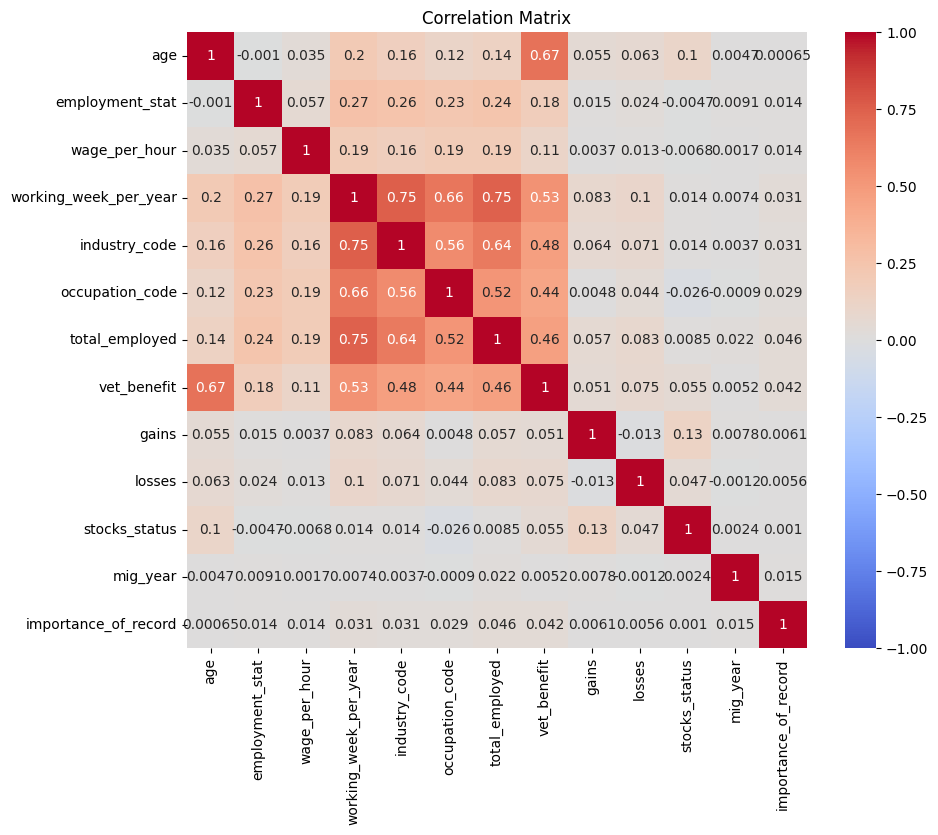

In [12]:
correlation_matrix = int_df.corr(method='pearson')  # You can also use 'spearman' or 'kendall'

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

#### Observations and Key Insights to Note


- Total dataset has about 209499 entries with 42 columns

- some columns have as high as over 100,000 missing rows hence we will drop such columns(filling in about half entries might misrepresent the actual data)

- There are no duplicates in the dataset

- Working_week_per_year column has quite a high correlation(over 70%) with industry_code and total_employed columns
- Ideally, independent variables should have very high correlation as this will affect the model and cause multicollinearity. Hence we will take out working_week_per_year column
- Other columns are not too highly correlated hence we can maintain them


#### Univariate Analysis

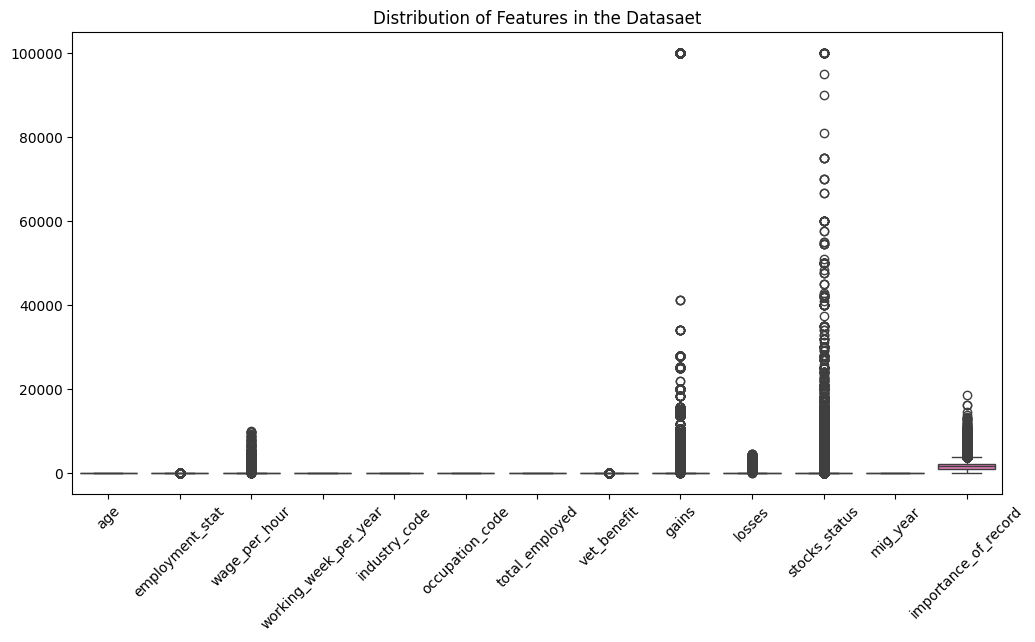

In [17]:
## Checking the distribution of Features in the dataset
df_filtered = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,6))
plt.title("Distribution of Features in the Datasaet")
sns.boxplot(data=df_filtered)
plt.xticks(rotation=45) 
plt.show()

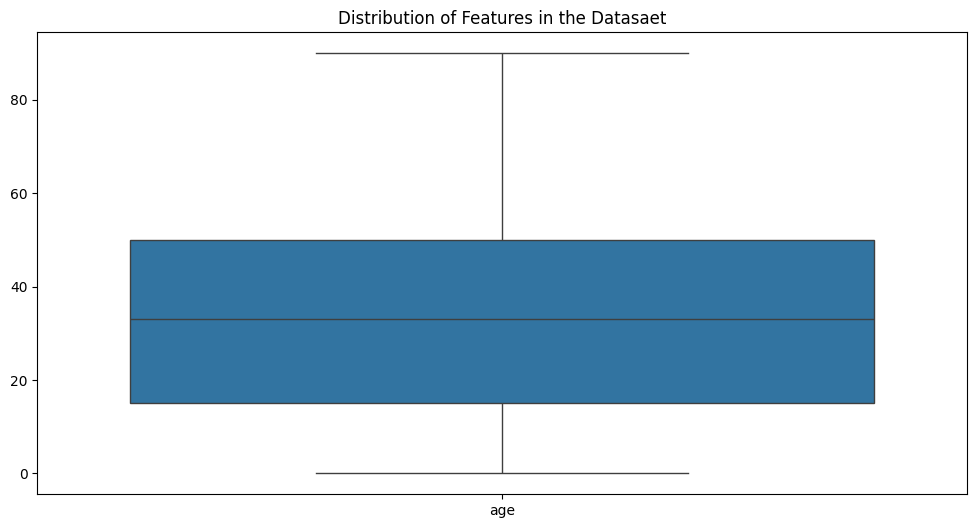

In [24]:
## Checking the distribution of Features in the dataset
df_filtered = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,6))
plt.title("Distribution of Features in the Datasaet")
sns.boxplot(data=df_filtered.iloc[:, :1 ])
plt.show()

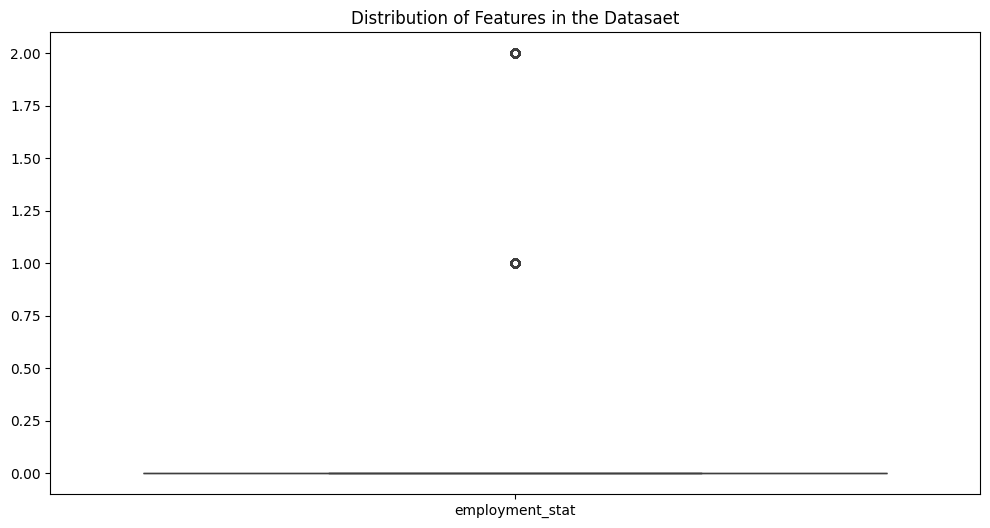

In [25]:
## Checking the distribution of Features in the dataset
df_filtered = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,6))
plt.title("Distribution of Features in the Datasaet")
sns.boxplot(data=df_filtered.iloc[:, 1:2 ])
plt.show()

Observations from Univariate Analysis
- It can be observed that there are outliers in most columns
- It can also be seen that the columns are on extremely wide and different scales and hence we might need normalization 

### Bivariate Analysis

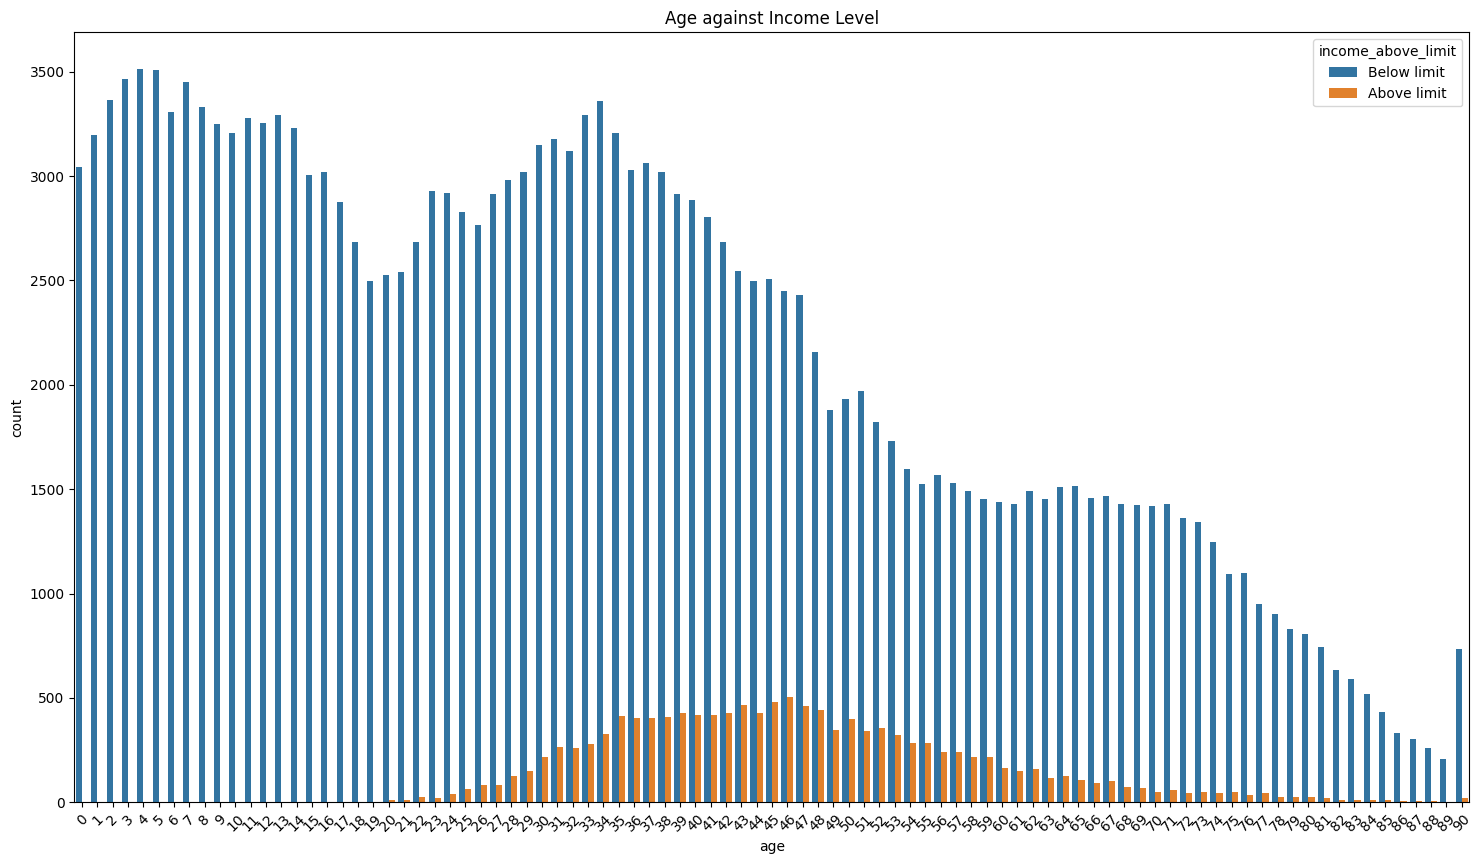

In [32]:
fig = plt.figure(figsize=(18,10))
sns.countplot(data=df, x="age", hue=df["income_above_limit"])
plt.title("Age against Income Level")
plt.xticks(rotation=45)
plt.show()

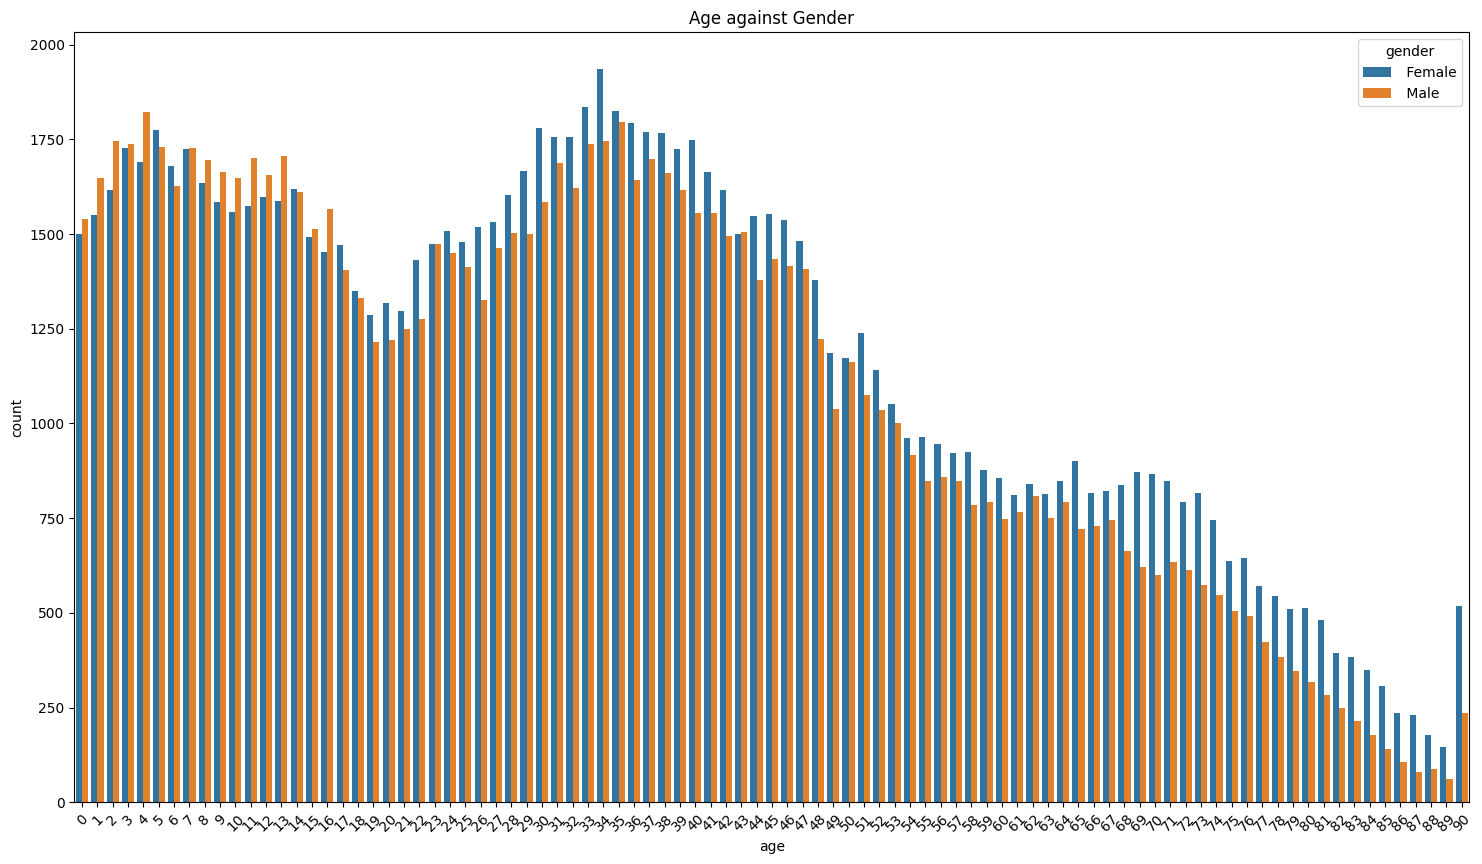

In [41]:
fig = plt.figure(figsize=(18,10))
sns.countplot(data=df, x="age", hue=df["gender"])
plt.title("Age against Gender")
plt.xticks(rotation=45)
plt.show()

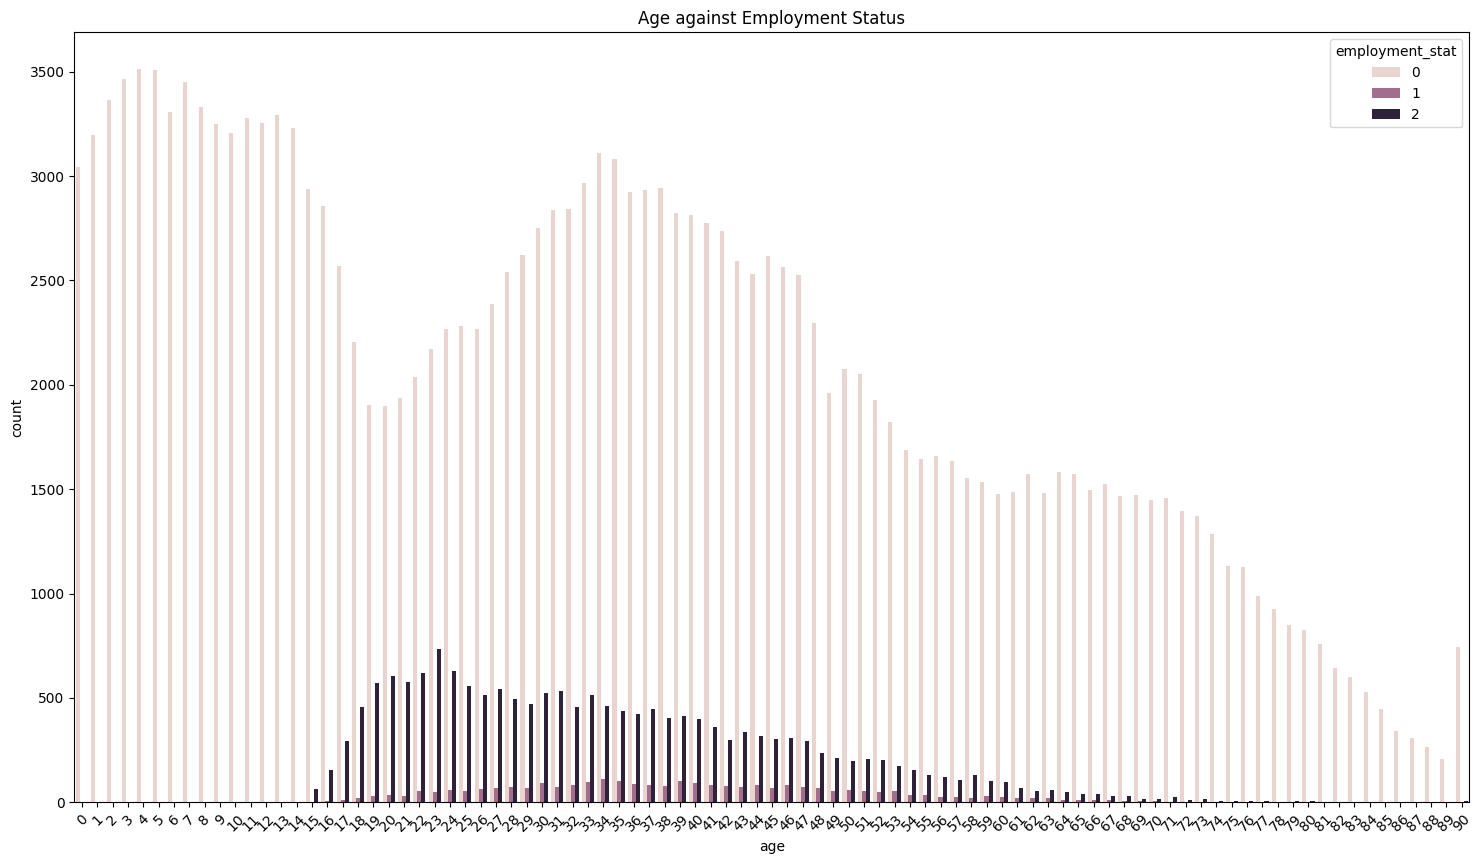

In [35]:
fig = plt.figure(figsize=(18,10))
sns.countplot(data=df, x="age", hue=df["employment_stat"])
plt.title("Age against Employment Status")
plt.xticks(rotation=45)
plt.show()

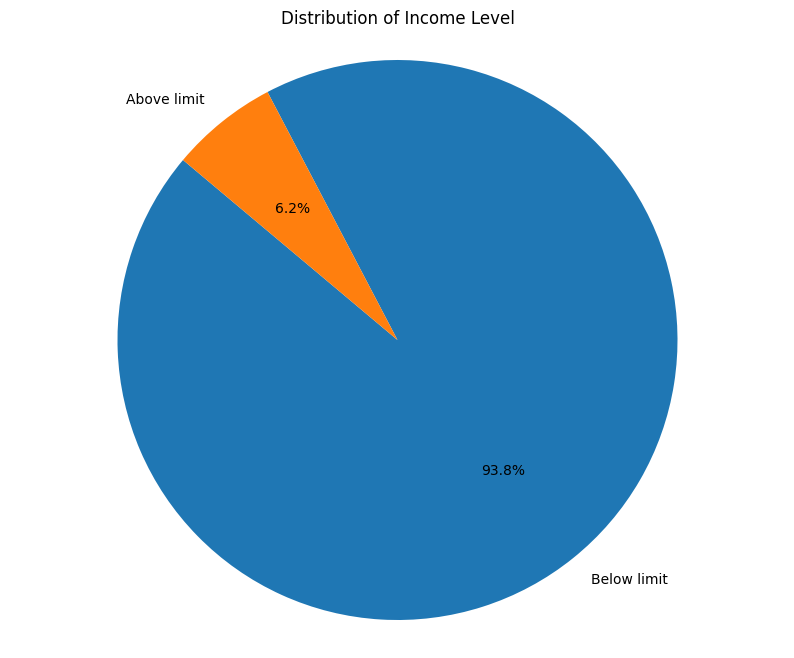

In [38]:
income_counts = df['income_above_limit'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Income Level")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [39]:
df.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


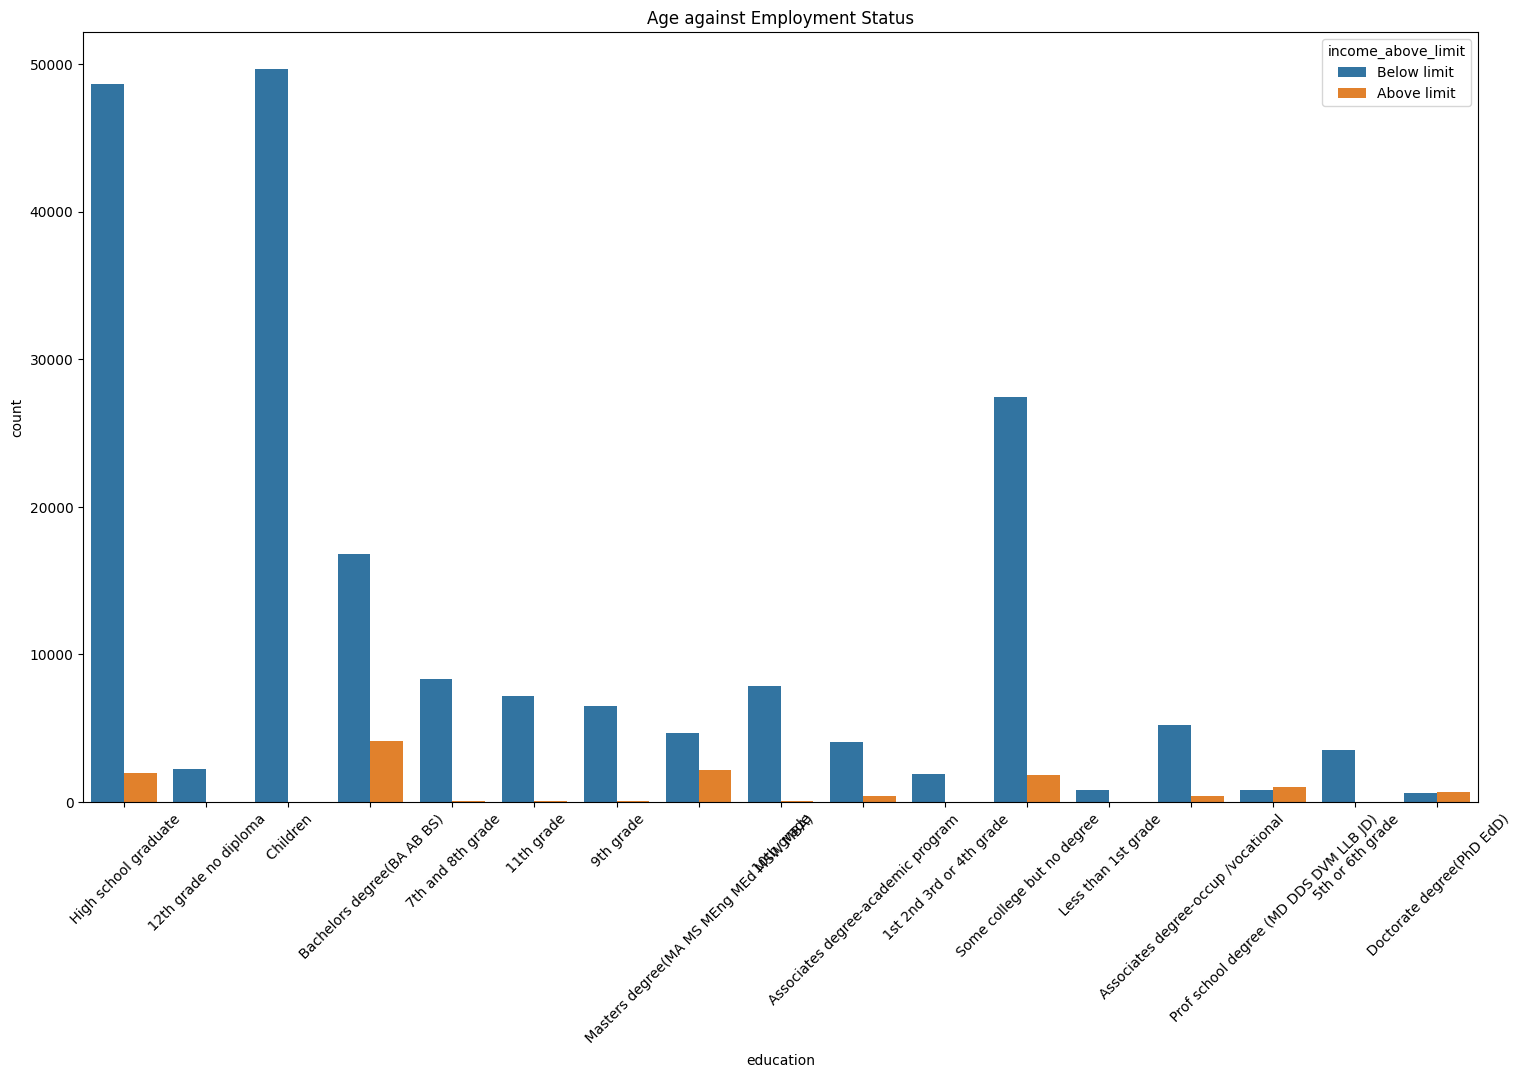

In [40]:
fig = plt.figure(figsize=(18,10))
sns.countplot(data=df, x="education", hue=df["income_above_limit"])
plt.title("Age against Employment Status")
plt.xticks(rotation=45)
plt.show()

Observations
- Most people with incomes above the limit are within the 35-55 year range
- Females are more than the males in the dataset provided
- The dataset is imbalance as the number of people with an income below the limit are extremely higher than those above the limit
- The category of people with a bachelors degree tend to have the most people earning over the limit, then masters and finally high school graduates respectively
- Children, high school graduates and 1st, 2nd, 3rd or 4th grade education levels respectively had income earners below the limit


### Analytical Questions

- What Age recorded the highest number of earners above the limit?

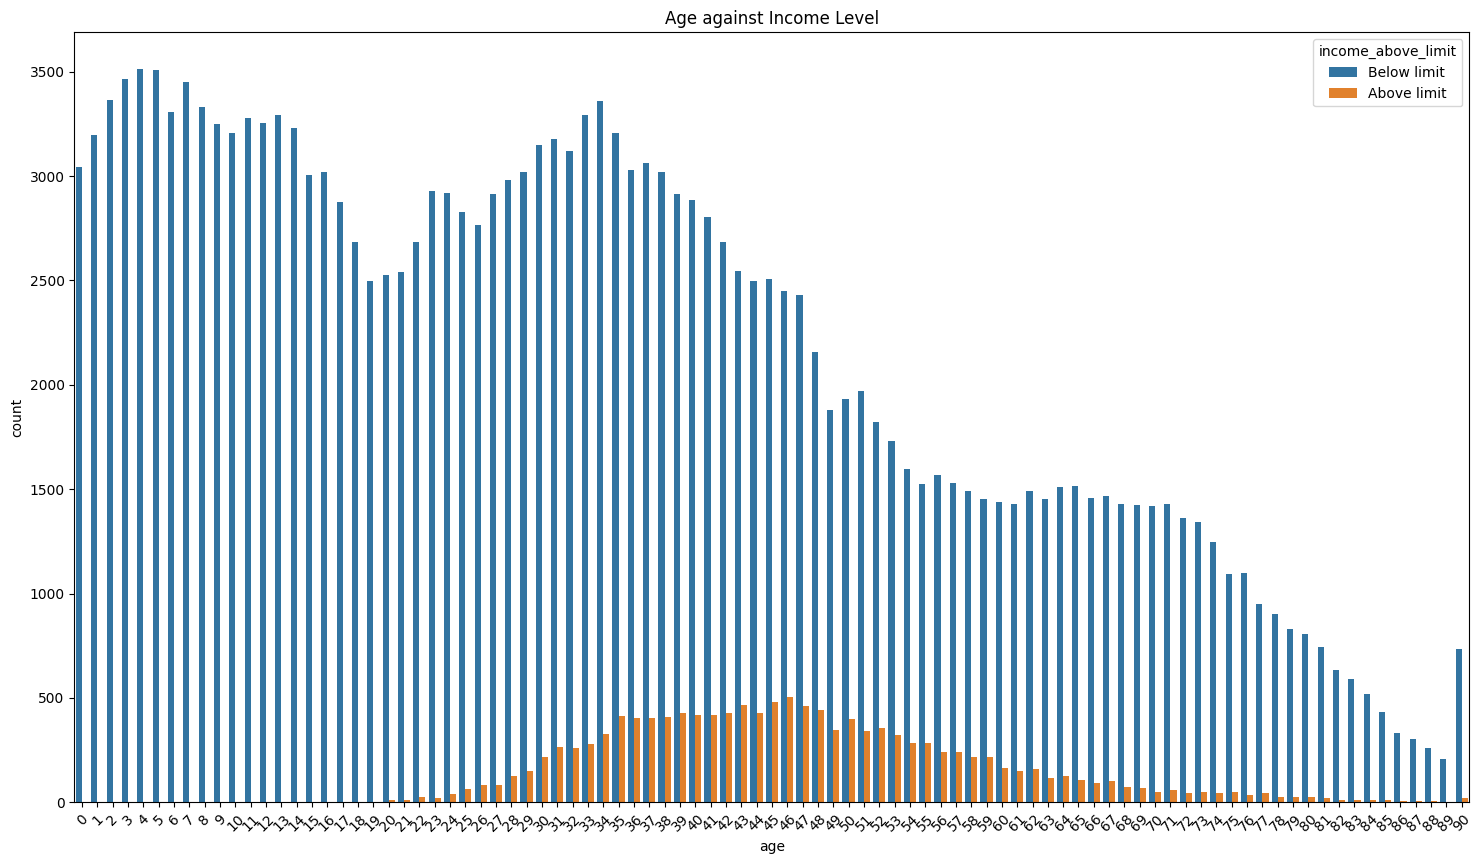

In [42]:
fig = plt.figure(figsize=(18,10))
sns.countplot(data=df, x="age", hue=df["income_above_limit"])
plt.title("Age against Income Level")
plt.xticks(rotation=45)
plt.show()

- What race had the highest earners?

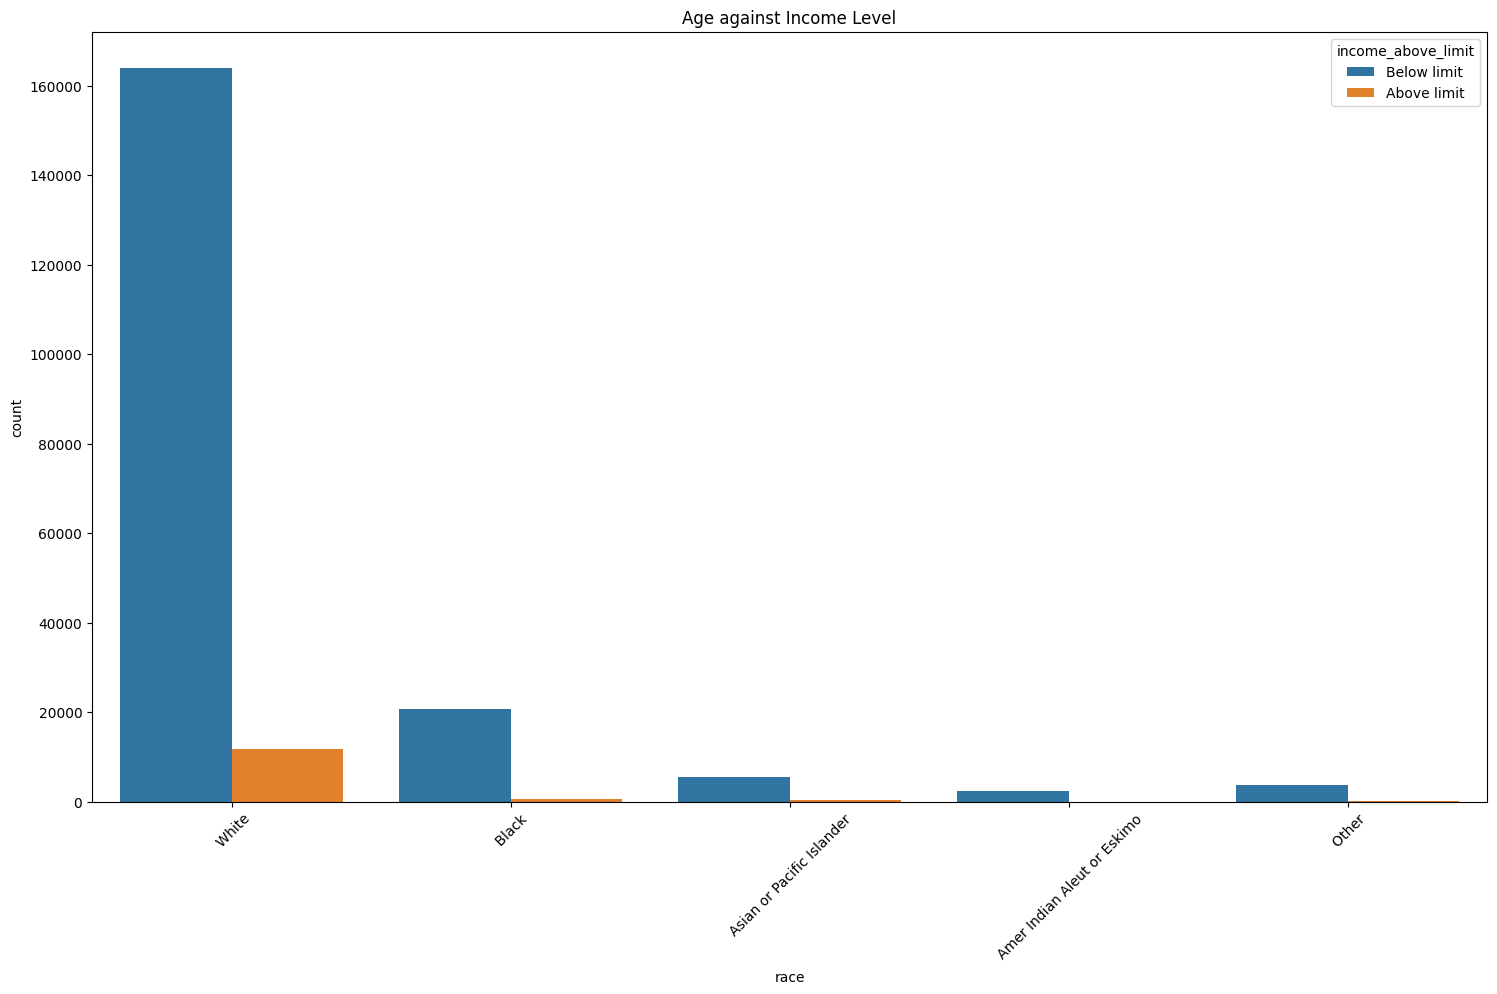

In [43]:
fig = plt.figure(figsize=(18,10))
sns.countplot(data=df, x="race", hue=df["income_above_limit"])
plt.title("Age against Income Level")
plt.xticks(rotation=45)
plt.show()

- What gender earns more?

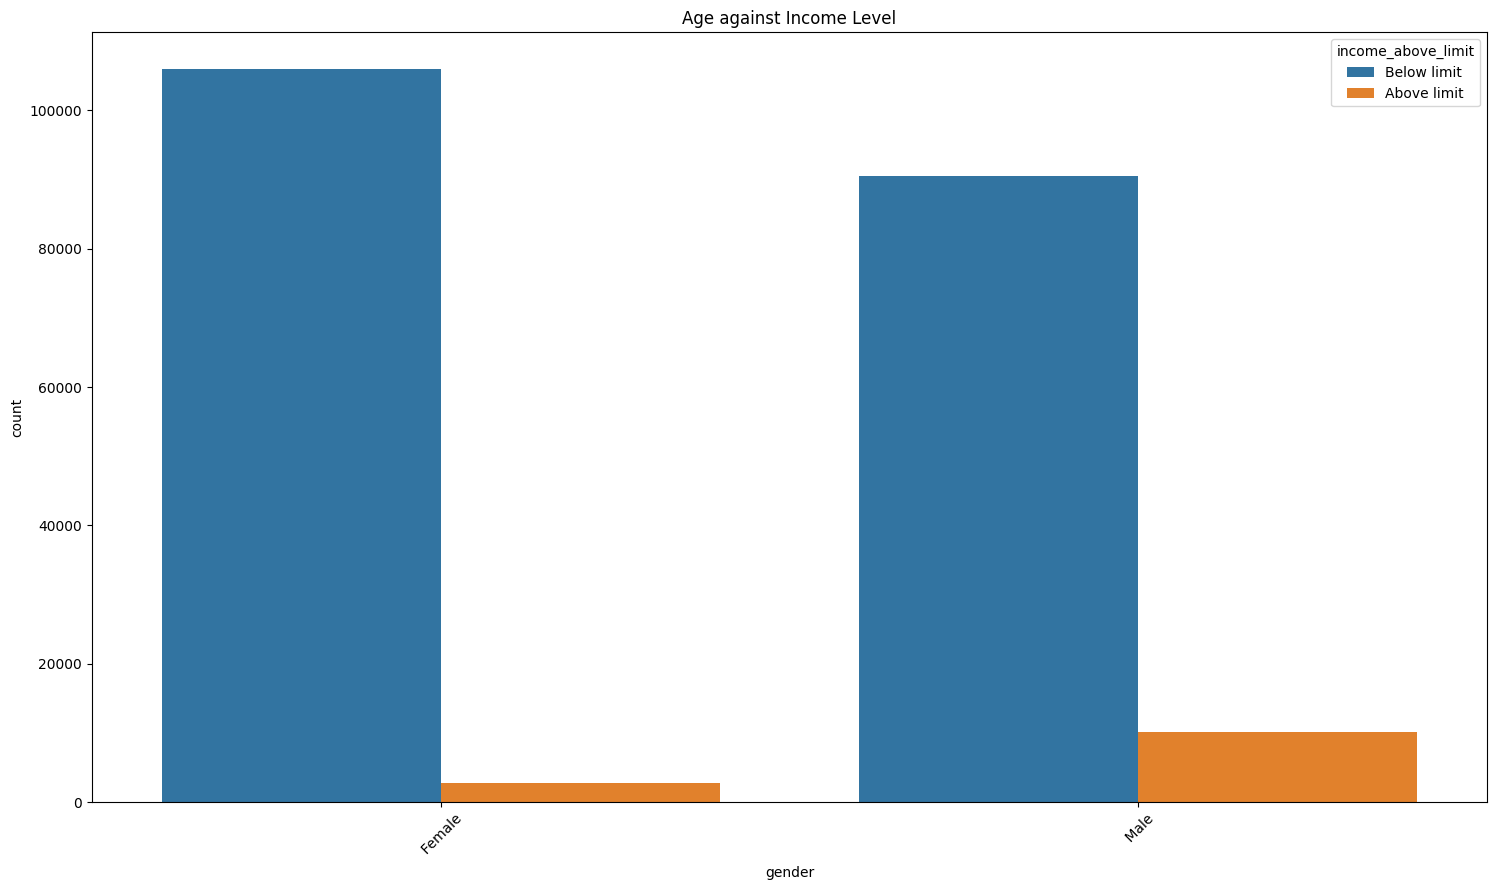

In [44]:
fig = plt.figure(figsize=(18,10))
sns.countplot(data=df, x="gender", hue=df["income_above_limit"])
plt.title("Age against Income Level")
plt.xticks(rotation=45)
plt.show()

- What is the income distribution?

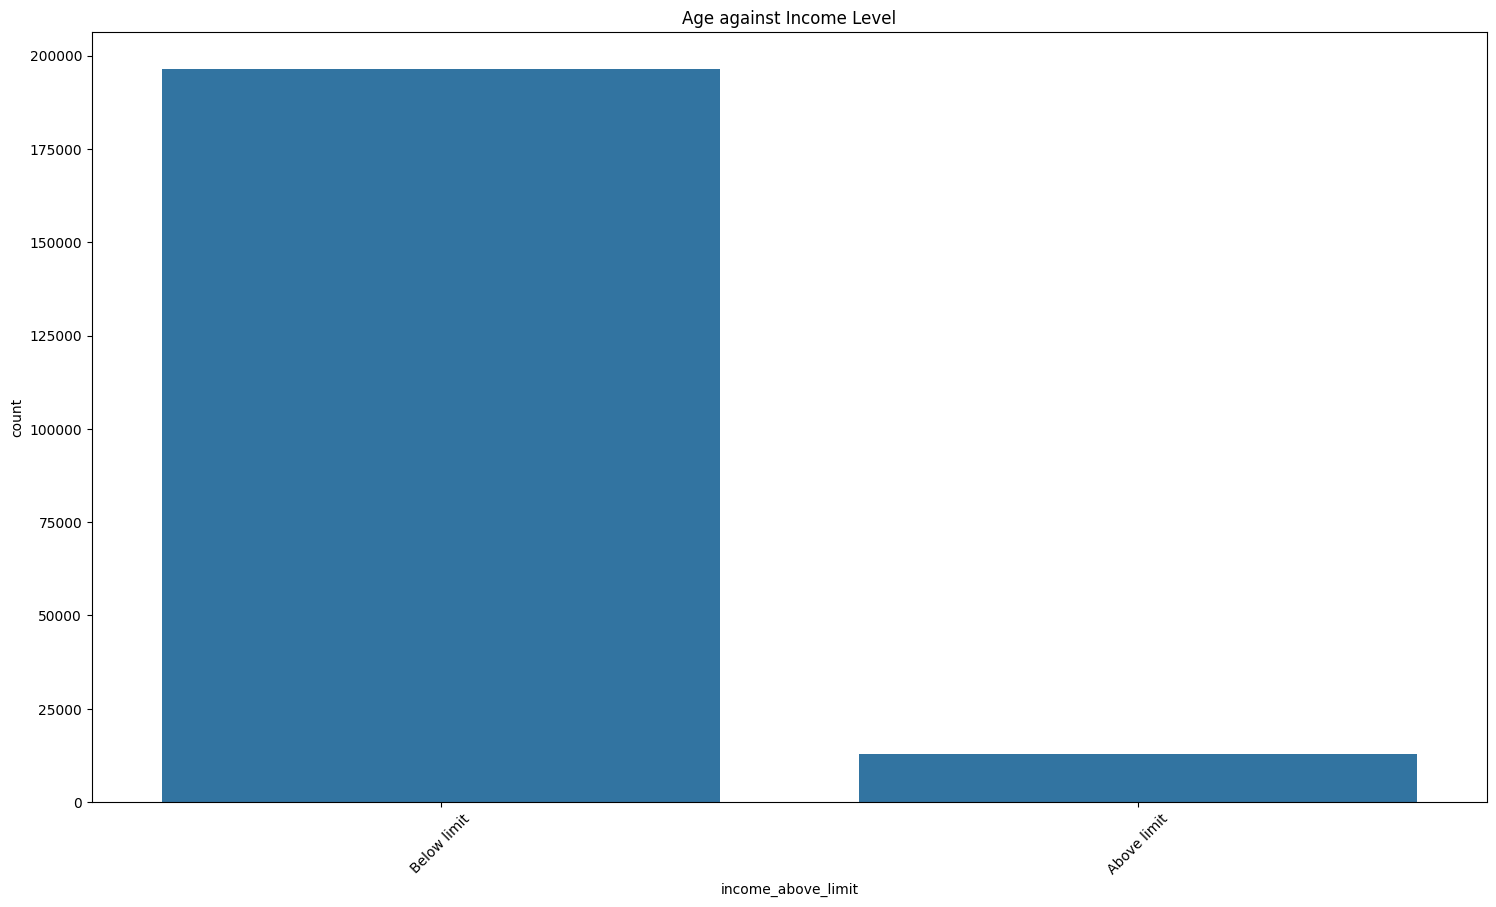

In [46]:
fig = plt.figure(figsize=(18,10))
sns.countplot(data=df, x="income_above_limit")
plt.title("Age against Income Level")
plt.xticks(rotation=45)
plt.show()

#### Hypothesis Testing

In [58]:
# create a  contingency table 
contingency_table = pd.crosstab(df["age"], df["income_above_limit"])

# chi test
chi2, p, _, _ = chi2_contingency(contingency_table)

print("P Value: ", p )

alpha = 0.05

if p < alpha:
    print("Reject the null hypothesis - there is no significant relationship between age and income level")

else: 
    print("Fail to reject the null hypothesis - There is a significant relationship between age and income level")

P Value:  0.0
Reject the null hypothesis - there is no significant relationship between age and income level


#### Data Preprocessing

In [61]:
df.isna().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [62]:
### dropping all columns with more than 100,000 null values
df.columns

Index(['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

In [66]:
df.iloc[:, 21:].isna().sum()

household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit                            0
tax_status                             0
gains                                  0
losses                                 0
stocks_status                          0
citizenship                            0
mig_year                               0
country_of_birth_own                   0
country_of_birth_father                0
country_of_birth_mother                0
migration_code_change_in_msa        1588
migration_prev_sunbelt             88452
migration_code_move_within_reg      1588
migration_code_change_in_reg        1588
residence_1_year_ago              106284
old_residence_reg                 193148
old_residence_state               193148
importance_of_record                   0
income_above_limit                     0
dtype: int64

In [67]:
### dropping columns with missing values over 1500
df_new = df.drop(columns=["class", "education_institute", "unemployment_reason","is_labor_union","occupation_code_main","under_18_family", "veterans_admin_questionnaire","old_residence_reg", "old_residence_state","migration_code_change_in_msa","migration_prev_sunbelt", "migration_code_move_within_reg", "migration_code_change_in_reg", "residence_1_year_ago", "old_residence_reg", "old_residence_state"])

In [68]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       209499 non-null  object 
 1   age                      209499 non-null  int64  
 2   gender                   209499 non-null  object 
 3   education                209499 non-null  object 
 4   marital_status           209499 non-null  object 
 5   race                     209499 non-null  object 
 6   is_hispanic              209499 non-null  object 
 7   employment_commitment    209499 non-null  object 
 8   employment_stat          209499 non-null  int64  
 9   wage_per_hour            209499 non-null  int64  
 10  working_week_per_year    209499 non-null  int64  
 11  industry_code            209499 non-null  int64  
 12  industry_code_main       209499 non-null  object 
 13  occupation_code          209499 non-null  int64  
 14  tota

In [69]:
df_new.isna().sum()

ID                         0
age                        0
gender                     0
education                  0
marital_status             0
race                       0
is_hispanic                0
employment_commitment      0
employment_stat            0
wage_per_hour              0
working_week_per_year      0
industry_code              0
industry_code_main         0
occupation_code            0
total_employed             0
household_stat             0
household_summary          0
vet_benefit                0
tax_status                 0
gains                      0
losses                     0
stocks_status              0
citizenship                0
mig_year                   0
country_of_birth_own       0
country_of_birth_father    0
country_of_birth_mother    0
importance_of_record       0
income_above_limit         0
dtype: int64

In [70]:
## dropping ID column 
df_new.drop(columns="ID", inplace=True)

In [71]:
df_new.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,importance_of_record,income_above_limit
0,79,Female,High school graduate,Widowed,White,All other,Not in labor force,0,0,52,...,0,0,292,Native,95,US,US,US,1779.74,Below limit
1,65,Female,High school graduate,Widowed,White,All other,Children or Armed Forces,0,0,0,...,0,0,0,Native,94,US,US,US,2366.75,Below limit
2,21,Male,12th grade no diploma,Never married,Black,All other,Children or Armed Forces,0,500,15,...,0,0,0,Native,94,US,US,US,1693.42,Below limit
3,2,Female,Children,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,0,...,0,0,0,Native,94,US,India,India,1380.27,Below limit
4,70,Male,High school graduate,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,...,0,0,0,Native,95,US,US,US,1580.79,Below limit


In [73]:
df_new.nunique()

age                            91
gender                          2
education                      17
marital_status                  7
race                            5
is_hispanic                    10
employment_commitment           8
employment_stat                 3
wage_per_hour                1232
working_week_per_year          53
industry_code                  52
industry_code_main             24
occupation_code                47
total_employed                  7
household_stat                 38
household_summary               8
vet_benefit                     3
tax_status                      6
gains                         132
losses                        114
stocks_status                1499
citizenship                     5
mig_year                        2
country_of_birth_own           43
country_of_birth_father        43
country_of_birth_mother        43
importance_of_record       102743
income_above_limit              2
dtype: int64

In [108]:
df_new.rename(columns={'income_limit_level': 'income_limit'}, inplace=True)


In [109]:
df_new.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,importance_of_record,income_limit
0,79,Female,High school graduate,Widowed,White,All other,Not in labor force,0,0,52,...,0,0,292,Native,95,US,US,US,1779.74,Below limit
1,65,Female,High school graduate,Widowed,White,All other,Children or Armed Forces,0,0,0,...,0,0,0,Native,94,US,US,US,2366.75,Below limit
2,21,Male,12th grade no diploma,Never married,Black,All other,Children or Armed Forces,0,500,15,...,0,0,0,Native,94,US,US,US,1693.42,Below limit
3,2,Female,Children,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,0,...,0,0,0,Native,94,US,India,India,1380.27,Below limit
4,70,Male,High school graduate,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,...,0,0,0,Native,95,US,US,US,1580.79,Below limit


In [110]:
##3 checking the unique values in our new dataframe of the columns
df_new.iloc[:, 2:3].value_counts()

education                             
High school graduate                      50627
Children                                  49685
Some college but no degree                29320
Bachelors degree(BA AB BS)                20979
7th and 8th grade                          8438
10th grade                                 7905
11th grade                                 7260
Masters degree(MA MS MEng MEd MSW MBA)     6861
9th grade                                  6540
Associates degree-occup /vocational        5650
Associates degree-academic program         4494
5th or 6th grade                           3542
12th grade no diploma                      2282
1st 2nd 3rd or 4th grade                   1917
Prof school degree (MD DDS DVM LLB JD)     1852
Doctorate degree(PhD EdD)                  1318
Less than 1st grade                         829
Name: count, dtype: int64

In [111]:
### Splitting data into features and target
X = df_new.drop(columns="income_limit")
y = df_new["income_limit"]

In [113]:
X.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,importance_of_record
0,79,Female,High school graduate,Widowed,White,All other,Not in labor force,0,0,52,...,Head of household,0,0,292,Native,95,US,US,US,1779.74
1,65,Female,High school graduate,Widowed,White,All other,Children or Armed Forces,0,0,0,...,Single,0,0,0,Native,94,US,US,US,2366.75
2,21,Male,12th grade no diploma,Never married,Black,All other,Children or Armed Forces,0,500,15,...,Single,0,0,0,Native,94,US,US,US,1693.42
3,2,Female,Children,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,0,...,Nonfiler,0,0,0,Native,94,US,India,India,1380.27
4,70,Male,High school graduate,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,...,Joint both 65+,0,0,0,Native,95,US,US,US,1580.79


In [114]:
y.head()

0    Below limit
1    Below limit
2    Below limit
3    Below limit
4    Below limit
Name: income_limit, dtype: object

Handling Outliers

In [115]:
## Replacing the outliers with the upper and lower bounds 
def replace_outliers(X, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column_name] = df[column_name].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    
    return df

In [116]:
## splitting data into categorical and numerical features
def process_columns(X):
    
    numeric_cols = []
    categorical_cols = []
    for column in X.columns:
        if X[column].dtype != 'object':
            X = replace_outliers(X, column)
            numeric_cols.append(column)
        else:
            categorical_cols.append(column)
    return X, numeric_cols, categorical_cols

In [117]:
X, numeric_cols, categorical_cols  = process_columns(X)

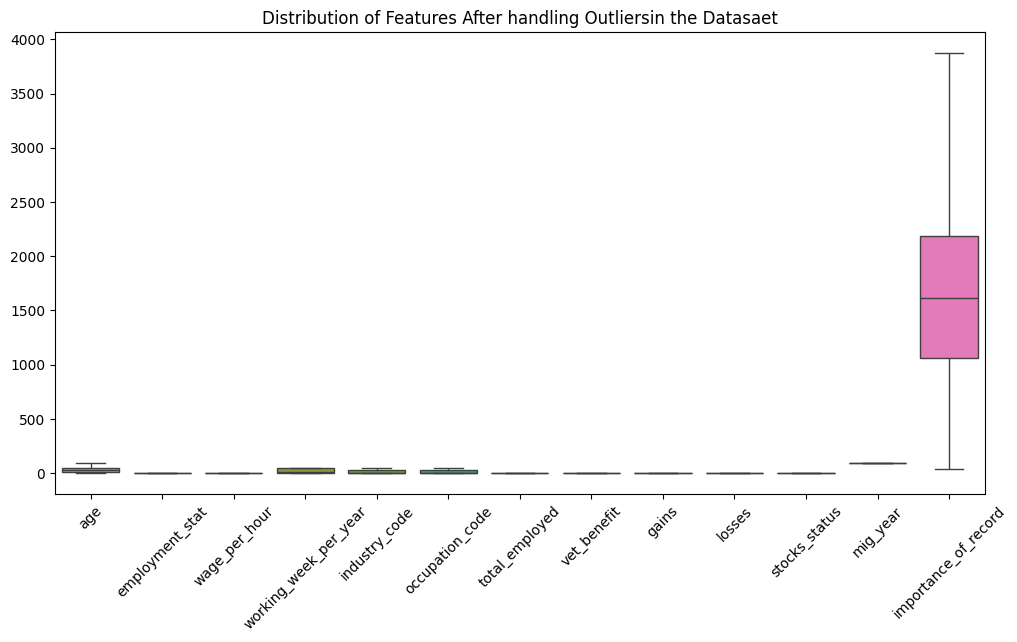

In [120]:
plt.figure(figsize=(12,6))
plt.title("Distribution of Features After handling Outliersin the Datasaet")
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.show()

In [128]:
label_enc = LabelEncoder()

In [129]:
# encoding the target y
y_encoded = label_enc.fit_transform(y)

In [132]:
## Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#### Numerical and Categorical Pipeline 

In [147]:
## creating pipeline for Preprocessing of categorical and numeric columns 
numerical_pipeline = Pipeline(steps=[ 
    ("num_imputer", SimpleImputer(strategy="median")), 
    ("scaler", StandardScaler())
])
categorical_pipeline = Pipeline(steps=[
    ("cat_imputer", SimpleImputer(strategy="most_frequent")), 
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_pipeline", numerical_pipeline, numeric_cols)
    ])

In [148]:
best_params_dict = {}
# Create pipelines for each model
pipelines = [
    ("XGBClassifier", Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", XGBClassifier(random_state=42))
    ])),
    ("Logistic Regression", Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(random_state=42))
    ])),
    ("Decision Tree", Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", DecisionTreeClassifier(random_state=42))
    ])),
    ("Random Forest", Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(random_state=42))
    ]))
]

In [158]:


# Assume pipelines is a dictionary containing model pipelines
# Example: pipelines = {"XGBClassifier": xgb_pipeline, "Logistic Regression": lr_pipeline, ...}

# Define hyperparameter grids for each model
param_grids = {
    "XGBClassifier": {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1, 0.3]
    },
    "Logistic Regression": {
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': [0.1, 1, 10]
    },
    "Decision Tree": {
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 5, 10, 20]
    },
    "Random Forest": {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 5, 10, 20]
    }
}

# Dictionary to store the best parameters for each model
best_params_dict = {}

# Number of parameter settings that are sampled
n_iter_search = 10  # You can adjust this number based on your preference

# Perform RandomizedSearchCV for each model
for model_name, pipeline in pipelines:
    param_grid = param_grids[model_name]
    random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, 
                                       n_iter=n_iter_search, cv=5, n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)
    best_params_dict[model_name] = random_search.best_params_

# Output the best parameters for each model
best_params_dict


{'XGBClassifier': {'classifier__n_estimators': 200,
  'classifier__max_depth': 5,
  'classifier__learning_rate': 0.1},
 'Logistic Regression': {'classifier__penalty': 'l2', 'classifier__C': 0.1},
 'Decision Tree': {'classifier__max_depth': 10,
  'classifier__criterion': 'entropy'},
 'Random Forest': {'classifier__n_estimators': 300,
  'classifier__max_depth': 20}}

In [159]:
models = [
    ("Logistic Regression", LogisticRegression(random_state=42, C=0.1, penalty='l2')),
    ("Decision Tree", DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=10)),
    ("Random Forest", RandomForestClassifier(random_state=42, max_depth=10, n_estimators=300)),
    ("XGBoost", XGBClassifier(random_state=42, learning_rate=0.1, max_depth=5, n_estimators=200))
]

In [163]:


# Initialize dictionaries to store pipelines and confusion matrices
all_pipeline = {}
all_confusion_matrix = {}

# Create a DataFrame to store the metrics
metric_table = pd.DataFrame(columns=["model", "precision", "recall", "f1-score"])

# Iterate through the models and classifiers
for model_name, classifier in models:

    # Create the pipeline with preprocessing and the classifier
    final_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", classifier)
    ])

    # Fit data to pipeline
    final_pipeline.fit(X_train, y_train)

    # Add the pipeline to the all_pipeline dictionary
    all_pipeline[model_name] = final_pipeline
    
    # Predict on evaluation set
    y_pred = final_pipeline.predict(X_test)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Add the confusion matrix to the all_confusion_matrix dictionary
    all_confusion_matrix[model_name] = conf_matrix

    # Generate classification report for each model or pipeline
    metrics = classification_report(y_test, y_pred, output_dict=True)

    # Extract key metrics
    accuracy = metrics["accuracy"]
    precision = metrics["weighted avg"]["precision"]
    recall = metrics["weighted avg"]["recall"]
    f1_score = metrics["weighted avg"]["f1-score"]
    
    print(f"{model_name} model is trained")
   
    # Save the trained pipeline
    filename = f'models/{model_name.replace(" ", "_")}.pkl'
    joblib.dump(final_pipeline, filename)

    print(f'Saved {model_name} pipeline to {filename}')
    
    # Add key metrics to the metrics table
    metric_table.loc[len(metric_table)] = [model_name, precision, recall, f1_score]

# Sort the metrics table by f1-score
metric_table = metric_table.sort_values(by="f1-score", ascending=False)

print(metric_table)


Logistic Regression model is trained
Saved Logistic Regression pipeline to models/Logistic_Regression.pkl
Decision Tree model is trained
Saved Decision Tree pipeline to models/Decision_Tree.pkl
Random Forest model is trained
Saved Random Forest pipeline to models/Random_Forest.pkl
XGBoost model is trained
Saved XGBoost pipeline to models/XGBoost.pkl
                 model  precision    recall  f1-score
3              XGBoost   0.934494  0.945370  0.932364
1        Decision Tree   0.929021  0.942482  0.929802
2        Random Forest   0.927438  0.939857  0.915486
0  Logistic Regression   0.908507  0.936945  0.910707


### Observation
- XGBoost seems to have the best performance with an f1 score of about 93.23% and precision of about 93.44%
- Decision Tree comes in second with f1 score of about 92.98 and precision of about 92.9

In [164]:
label_enc = LabelEncoder()
label_enc.fit_transform(y)
##save the lebel encoder to models
joblib.dump(label_enc, 'models/label_encoder.pkl')

['models/label_encoder.pkl']

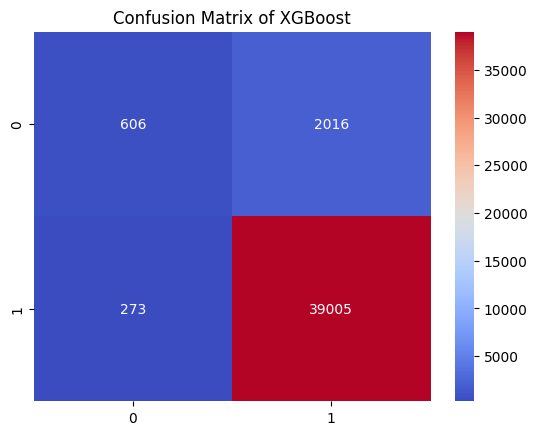

In [166]:
## checking the confusion matrix of the top two models (XGBoost and Logistic Regression)
conf_mat = all_confusion_matrix["XGBoost"]
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix of XGBoost")
plt.show()

In [167]:
all_confusion_matrix["XGBoost"]

array([[  606,  2016],
       [  273, 39005]])

### Observations and key insights
- The XGBoost model correctly predicts 3905 entries as above limit and predicts correctly 606 entries as below limit
- We can see that the model performs very well when predicting people who earned above the limit. (TP 39005 against the FP 273 is quite impressive)
- But we can also see that the model performs poorly when predicting people who earned below the limit.(TN 606 against the FN 2016 is quite poor indicating our model isnt really able to predict 
earners below the limit properly)
- Hence we need to find a threshold which balances our models performance in both scenarios


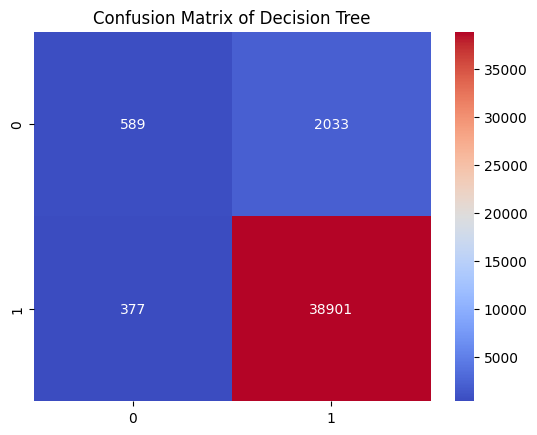

In [169]:
## checking the confusion matrix of the top two models 
conf_mat = all_confusion_matrix["Decision Tree"]
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix of Decision Tree")
plt.show()

### Observation
- A similar situation is observed in the Decision Tree model as well
- Hence we need a threshold that balances both criteria(TP and TN)
- In our case, the ROC data gives us only the chance to manipulate the TPR and FPR, hence we need a threshold that yields more TPR and less FPR(By reducing FPR, the model is able to predict more TN)

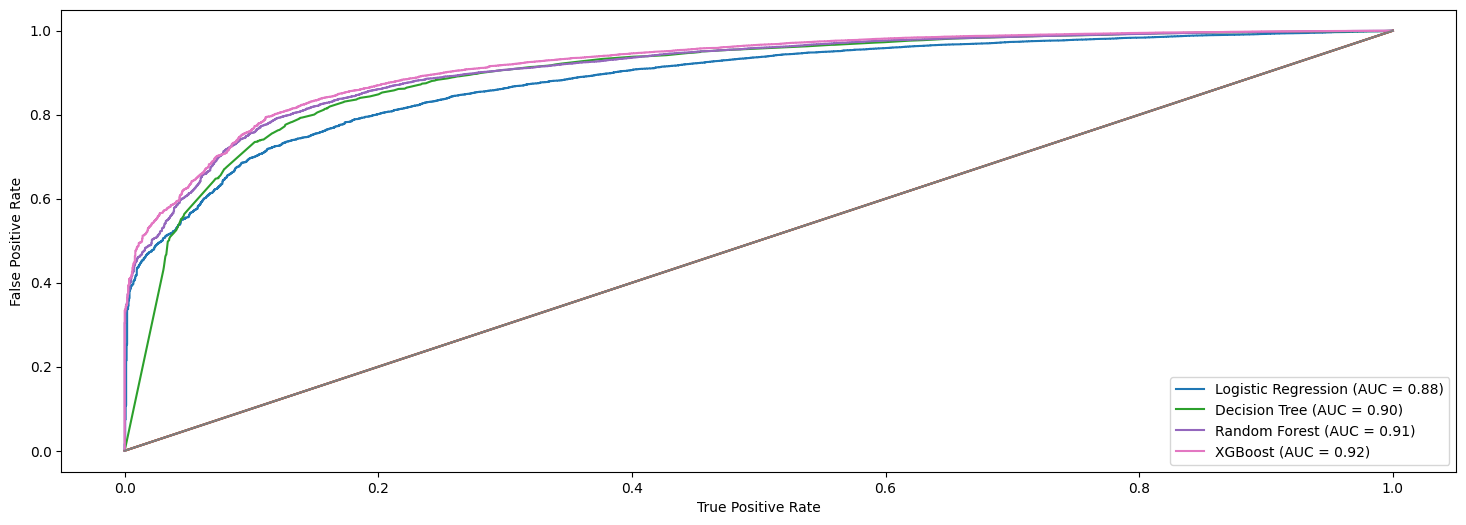

In [170]:
##plotting the ROC Curve
fig, ax = plt.subplots(figsize=(18, 6))

all_confusion_matrix = {}
all_roc_data = {}

for model_name, Pipeline in all_pipeline.items():

    y_score = Pipeline.predict_proba(X_test)[:, 1]  

    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    roc_auc = auc(fpr, tpr)

    roc_data_df = pd.DataFrame({"False Postive rate": fpr, "True Positive rate": tpr, "Threshold": thresholds})

    all_roc_data[model_name] = roc_data_df

    ax.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

    ax.plot([0,1], [0,1])
    ax.set_ylabel("False Positive Rate")
    ax.set_xlabel("True Positive Rate")
plt.legend()
plt.show()


#### Observations from ROC Curve
- We see that XGBoost has a relatively higher AUC indicating it has the potential of predicting much better than the other models across different thresholds
- Random Forest comes in second, even though initially the confusion matrix showcased the Decision Tree as the second best, the AUC provides better clarification across all thresholds

### Notes
- The classification matrix usually uses a threshold of 0.5, hence we can see that at 0.5, Decision Tree is actually doing better than Random Forest.
- But if you take a look at other thresholds, we realise that Random Forest does much better 


In [207]:
## Performance of XGBoost by threshold
all_roc_data["XGBoost"].tail(2500)

,False Postive rate,True Positive rate,Threshold
4947,0.204805,0.873593,0.899532
4948,0.205187,0.873593,0.899493
4949,0.205187,0.873746,0.899258
4950,0.205568,0.873746,0.899250
4951,0.205568,0.874153,0.899029
...,...,...,...
7442,0.994661,0.999949,0.159458
7443,0.994661,0.999975,0.157944
7444,0.998856,0.999975,0.147466
7445,0.998856,1.000000,0.141061


In [210]:
## Performance of Random Forest by threshold
all_roc_data["Random Forest"].tail(2500)

,False Postive rate,True Positive rate,Threshold
3966,0.229977,0.880900,0.872078
3967,0.229977,0.881104,0.871802
3968,0.230359,0.881104,0.871761
3969,0.230359,0.881231,0.871654
3970,0.230740,0.881231,0.871603
...,...,...,...
6461,0.998474,0.999949,0.410918
6462,0.998474,0.999975,0.410060
6463,0.998856,0.999975,0.408676
6464,0.998856,1.000000,0.407249


In [208]:
# Assinging a threshold to the XGBoost model to predict the Sepsis
threshold = 0.899532
y_pred_proba = all_pipeline["XGBoost"].predict_proba(X_test)[:,1]
binary_predictions = np.where(y_pred_proba > threshold, 1, 0)
threshold_matrix = confusion_matrix(y_test, binary_predictions)

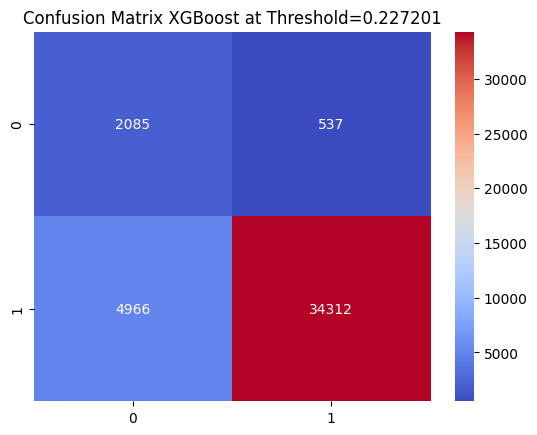

In [209]:
## Visualizing the improvement of our XGBoost model to predict more True positives after changing the threshold to 0.899532
sns.heatmap(threshold_matrix, annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix XGBoost at Threshold=0.899532")
plt.show()

Observation & Insights
- We can see that after selecting a threshold which gives more TPR (correctly predict people above the limit) and less FPR (incorrectly predict people below the limit), we are able to achieve the goal of this project.
- Now XGBoost model is able to predict more TN (True negatives) at an accuracy of about 80% and TP at an accuracy of about 87% after selecting a threshold of 0.899532
- This is better than the initial accuracy when predicting TN (which was around 23%)
- Though the number of TP being predicted has slightly reduced, this is a good balance between predicting people below income limit and people above income limit


In [219]:
# Assinging a threshold to the Random Forest model to predict the Sepsis
threshold = 0.871761
y_pred_proba = all_pipeline["Random Forest"].predict_proba(X_test)[:,1]
binary_predictions = np.where(y_pred_proba > threshold, 1, 0)
threshold_matrix_2 = confusion_matrix(y_test, binary_predictions)

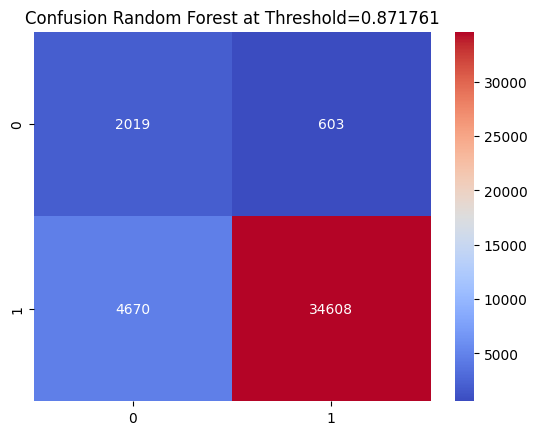

In [220]:
## Visualizing the improvement of our Random Forest model to predict more True positives after changing the threshold to 0.899532
sns.heatmap(threshold_matrix_2, annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Random Forest at Threshold=0.871761")
plt.show()

Observation
- We can see that there is a good balance between TP and TN prediction accuracy after selecting a threshold of 0.871761 for the Random Forest model
